# BilayerAnalyzer

The BilayerAnalyzer class is the primary tool in the bilayer_analyzer module. It is used to construct a set analyses and (at the moment a limited set) of plot builders. The BilayerAnalyzer can be imported from the bilayer_analyzer module set:

In [1]:
#import the BilayerAnalyzer class 
from pybilt.bilayer_analyzer import BilayerAnalyzer

/home/blake/anaconda2/envs/pybilt/lib/python2.7/site-packages/MDAnalysis/due.py:88: UserWarning: No module named mock
  warnings.warn(str(err))


## Constructing a BilayerAnalyzer instance

We can then build an analyzer instance and construct our analysis set. The BilayerAnalyzer can be initialized in three ways.

### 1. via psf_file, trajectory, and selection keyword options.

In [2]:
#initialize analyzer with keyword options--and default analyses
sel_string = "resname POPC or resname DOPE or resname TLCL2"
ba = BilayerAnalyzer(
    structure='../pybilt/sample_bilayer/sample_bilayer.psf',
    trajectory='../pybilt/sample_bilayer/sample_bilayer_10frames.dcd',
    selection=sel_string,
)

parsing inputs...
setting up analysis protocol:
build objects:
mda_frame
com_frame
with analysis:
Analysis: Single time origin mean squared displacement.
  with analysis_id: msd_1 
   and settings: 
    leaflet: both 
    resname: all 
setting up plot protocol
('trajectory', '../pybilt/sample_bilayer/sample_bilayer_10frames.dcd')
('selection', 'resname POPC or resname DOPE or resname TLCL2')
('structure', '../pybilt/sample_bilayer/sample_bilayer.psf')
building the MDAnalysis objects...
['natoms', 'trajectory_file', 'mda_trajectory', 'bilayer_sel', 'n_residues', 'residues', 'nframes', 'indices', 'psf_file', 'bilayer_sel_string', 'mda_universe']


This constructs an analyzer for the given structure (psf_file) and trajectory (trajectory). The selection keyword value is a MDAnalysis selection string that picks out the bilayer lipids from the rest of the system. Although a file path and name are used in this example for the 'trajectory', a list of trajectory files can also be passed to the analyzer.

> Note: Athough the keyword psf_file implies that a CHARMM psf file should be used for the structure file, any valid structure file input to MDAnalysis can be used. See the [topology readers](https://pythonhosted.org/MDAnalysis/documentation_pages/topology/init.html) MDAnalysis page for more details.

> Note: In addition to a filename string, the trajectory keyword argument also accepts a list of filename strings for loading multiple trajectory files.  

> Note: Each lipid is assumed to be a unique residue within the provided selection. See the [selections](https://pythonhosted.org/MDAnalysis/documentation_pages/selections.html) page for details on making MDAnalysis selections.

The BilayerAnalyzer is initialized with a single default mean squared displacement analysis (MSD) as shown in the std out text:
    with analysis:
    Analysis: Mean squared displacements
      with analysis_id: msd_1 
       and settings: 
        leaflet: both 
        resname: all 
The MSD analysis has the analysis_id 'msd_1'. Each analysis in the set of analyses are assigned a unique analysis_id, which is used to reference that particular analysis. And we can see that the msd_1 analysis has the settings 'leaflet' and 'resname'. Each analysis may have settings that are initialized with pre-set defaults that(outside of this default MSD analysis) can be user specified.  

#### Listing the valid analyses that can be added to the BilayerAnalyzer instance
There is a set of analyses that can be defined and assigned as part of the built-in analysis protocols of a BilayerAnalyzer instance. A function in the bilayer_analyzer module is provided to print these to std out:

In [3]:
#let's import the function
from pybilt.bilayer_analyzer import print_valid_analyses

We can call the function to get a complete list of the built-in analyses available to BilayerAnalyzer instances including the analysis_key, a short statement/description about what the analysis is, and the adjustable settings of that analysis (settings outputs of 'none' means that that analysis has no adjustable settings).

In [4]:
print_valid_analyses()

analysis_key: disp_vec_corr_avg ---> Weighted average of displacement vector correlations.
  with settings:
    leaflet --> <type 'str'>
    resname --> <type 'str'>
    interval --> <type 'int'>
    wrapped --> <type 'bool'>
analysis_key: loa ---> Lateral lipid orientation angle.
  with settings:
    resname --> <type 'str'>
    leaflet --> <type 'str'>
    ref_atom_2 --> <type 'str'>
    ref_atom_1 --> <type 'str'>
analysis_key: apl_grid ---> Area per lipid using 2D lipid grids.
  with settings:
    none --> <type 'NoneType'>
analysis_key: dc_cluster ---> Hiearchical clustering of lipids based on distance.
  with settings:
    resname --> <type 'str'>
    leaflet --> <type 'str'>
    cutoff --> <type 'float'>
analysis_key: spatial_velocity_corr ---> Weighted average of displacement vector correlations.
  with settings:
    n_bins --> <type 'int'>
    interval --> <type 'int'>
    range_outer --> <type 'float'>
    leaflet --> <type 'str'>
    range_inner --> <type 'float'>
    resnam

/home/blake/src/python/PyBILT/dev/PyBILT/pybilt/bilayer_analyzer/analysis_protocols.py:769: UserWarning: ignoring invalid argument key analysis_id for analysisnone
  "ignoring invalid argument key " + arg_key + " for analysis" + self.analysis_id)


Importantly, each type of analysis has a unique analysis_key (e.g. 'msd' and 'apl_box'). The analysis_key is used to specify the analysis type when adding analyses to the analyzer. 

#### 2. via an input file

The analyzer can also be created using an input file with the necessary commands. Let's look at an example: the file 'PyBILT/tests/sample_1.in' which reads :
> \#set the structure file (psf) for the system 
 
> structure ../sample_bilayer/sample_bilayer.psf

> \#set the trajectory file

> trajectory ../sample_bilayer/sample_bilayer_10frames.dcd

> \#MDAnalysis syntax selection text to select the bilayer

> selection "not resname CLA and not resname TIP3 and not resname POT"

> \#define an analysis for mean squared displacement (msd): named 'msd_1'

> analysis msd msd_1

> \#define an analysis for mean squared displacement (msd) for (resname) POPC lipids in the
> \#upper leaflet of the bilayer: named 'msd_2' 

> analysis msd msd_2 leaflet upper resname POPC

> \#define a plot for mean squared displacement data (msd) including computes 'msd_1' and 
'msd_2': named 'msd_p'

> plot msd msd_p msd_1 DOPE-U msd_2 POPC-U


In this input script there are five different command types that will be parsed by the analyzer during intialization. The first three 'psf', 'trajectory', and 'selection' are required (similar to their keyword counterparts in initialization 1). 

The other two command types used in this input script are the 'analysis' and 'plot'. 'analysis' commands are used to add analyses to the analyzers set of protocols. They hsave the basic format:

> analysis analysis_key analysis_id

and additionally the analysis settings can be set using the format:

> analysis analysis_key analysis_id setting_key value

In the same spirit the 'plot' command is used to add 'auto' plot builders to the set of protocols in the ianalyzer. 

>Note: Currently the plotting protocols development is behind that of the analysis protocols and therefore not all analyzer built-in analyses have corresponding built-in plot protocols. Some additional plotting tools are provided in pybilt's plot_generation module (although many of the newer analyses that have been added don't have plot functions in this module either, so will require direct use of matplotlib (or other tool) to generate plots. 

The plot command has a very similar format to that of the analysis command with the type of plotting specified by a 'plot_key' and the particular plot identified with a 'plot_id'. 
The plot command in the input script for genrating MSD time series plots has the format:

> plot plot_key plot_id analysis_id legend_name ...

Now let's actually initialize the analyzer using the input script:

In [5]:
ba = BilayerAnalyzer(input_file="../tests/sample_1.in")

parsing input file '../tests/sample_1.in'...
msd msd_1
msd msd_2 leaflet upper resname POPC
msd msd_p msd_1 DOPE-U msd_2 POPC-U
setting up analysis protocol:
build objects:
lipid_grid
vector_frame
mda_frame
com_frame
with analysis:
Analysis: Single time origin mean squared displacement.
  with analysis_id: msd_1 
   and settings: 
    leaflet: both 
    resname: all 
Analysis: Single time origin mean squared displacement.
  with analysis_id: msd_2 
   and settings: 
    leaflet: upper 
    resname: POPC 
setting up plot protocol
('trajectory', '../pybilt/sample_bilayer/sample_bilayer_10frames.dcd')
('selection', 'resname POPC DOPE TLCL2')
('analysis', ['msd msd_1', 'msd msd_2 leaflet upper resname POPC'])
('structure', '../pybilt/sample_bilayer/sample_bilayer.psf')
('plot', ['msd msd_p msd_1 DOPE-U msd_2 POPC-U'])
building the MDAnalysis objects...
['natoms', 'trajectory_file', 'mda_trajectory', 'bilayer_sel', 'n_residues', 'residues', 'nframes', 'indices', 'psf_file', 'bilayer_sel_str

### 3. Using an input dictionary

Finally, the analyzer can be initialized using an input dictionary. The dictionary should at least have the 3 required keywords 'psf_file', 'trajectory', and 'selection'

In [6]:
# define the input dictionary
input_dict = {'structure' : '../pybilt/sample_bilayer/sample_bilayer.psf', 
             'trajectory' : '../pybilt/sample_bilayer/sample_bilayer_10frames.dcd',
              'selection' : 'resname POPC or resname DOPE or resname TLCL2' 
             }

#now initialize the analyzer
ba = BilayerAnalyzer(input_dict=input_dict)

              

setting up analysis protocol:
build objects:
lipid_grid
vector_frame
mda_frame
com_frame
with analysis:
Analysis: Single time origin mean squared displacement.
  with analysis_id: msd_1 
   and settings: 
    leaflet: both 
    resname: all 
setting up plot protocol
('trajectory', '../pybilt/sample_bilayer/sample_bilayer_10frames.dcd')
('selection', 'resname POPC or resname DOPE or resname TLCL2')
('structure', '../pybilt/sample_bilayer/sample_bilayer.psf')
building the MDAnalysis objects...
['natoms', 'trajectory_file', 'mda_trajectory', 'bilayer_sel', 'n_residues', 'residues', 'nframes', 'indices', 'psf_file', 'bilayer_sel_string', 'mda_universe']


We can also use the input dictionary to initialize the analyzer with analysis and plot protocols.

In [7]:
# define the input dictionary
input_dict = {'structure' : '../pybilt/sample_bilayer/sample_bilayer.psf', 
             'trajectory' : '../pybilt/sample_bilayer/sample_bilayer_10frames.dcd',
              'selection' : 'resname POPC or resname DOPE or resname TLCL2',
              'analysis' : ['msd msd_1 resname POPC', 'msd msd_2 resname DOPE'],
              'plot' : ['msd msd_p msd_1 POPC msd_2 DOPE']
             }

#now initialize the analyzer
ba = BilayerAnalyzer(input_dict=input_dict)

setting up analysis protocol:
build objects:
lipid_grid
vector_frame
mda_frame
com_frame
with analysis:
Analysis: Single time origin mean squared displacement.
  with analysis_id: msd_1 
   and settings: 
    leaflet: both 
    resname: POPC 
Analysis: Single time origin mean squared displacement.
  with analysis_id: msd_2 
   and settings: 
    leaflet: both 
    resname: DOPE 
setting up plot protocol
('trajectory', '../pybilt/sample_bilayer/sample_bilayer_10frames.dcd')
('selection', 'resname POPC or resname DOPE or resname TLCL2')
('structure', '../pybilt/sample_bilayer/sample_bilayer.psf')
('analysis', ['msd msd_1 resname POPC', 'msd msd_2 resname DOPE'])
('plot', ['msd msd_p msd_1 POPC msd_2 DOPE'])
building the MDAnalysis objects...
['natoms', 'trajectory_file', 'mda_trajectory', 'bilayer_sel', 'n_residues', 'residues', 'nframes', 'indices', 'psf_file', 'bilayer_sel_string', 'mda_universe']


### Adding and removing analyses (post initialization)

Analyses can be added to the analyzer using the add_analysis function.

First, let's list the analyses that are present in the analyzer.

In [8]:
ba.print_analysis_protocol()

build objects:
lipid_grid
vector_frame
mda_frame
com_frame
with analysis:
Analysis: Single time origin mean squared displacement.
  with analysis_id: msd_1 
   and settings: 
    leaflet: both 
    resname: POPC 
Analysis: Single time origin mean squared displacement.
  with analysis_id: msd_2 
   and settings: 
    leaflet: both 
    resname: DOPE 


As we can see from the output there are two analyses: msd_1 and msd_2. Both are MSD computations; one is for POPC lipids and the other is for DOPE lipids. Now let's add an MSD analysis for the TLCL2 lipids using the string format. 

In [9]:
#add the new analysis -- using an input string
ba.add_analysis('msd msd_3 resname TLCL2')
#now reprint the analysis protocols
ba.print_analysis_protocol()

build objects:
lipid_grid
vector_frame
mda_frame
com_frame
with analysis:
Analysis: Single time origin mean squared displacement.
  with analysis_id: msd_1 
   and settings: 
    leaflet: both 
    resname: POPC 
Analysis: Single time origin mean squared displacement.
  with analysis_id: msd_2 
   and settings: 
    leaflet: both 
    resname: DOPE 
Analysis: Single time origin mean squared displacement.
  with analysis_id: msd_3 
   and settings: 
    leaflet: both 
    resname: TLCL2 


Analyses can be added using three formats: string, list/tuple, and a dictionary. We've seen the string format above, which is similar to the format used in an input initialization file/script. Now let's add some analyses using the other two options. 

In [10]:
# add bilayer thickness analysis using a list -- bilayer_thickness
#  has no settings so we just pass an empty dictionary as the third element
ba.add_analysis(['bilayer_thickness', 'bt', {}])
# add area compressibility modulus computation using a dictionary
ba.add_analysis({'analysis_key': 'acm', 'analysis_id': 'acomp',
                 'analysis_settings':{'temperature':310.0}})

The must contain three elements: analysis_key string, analysis_id string, and settings dictionary. If the analysis has no adjustable settings, or if you just want to use the defaults, you can pass in empty dictionary.

The dictionary must have three keys: 'analysis_key', 'analysis_id', and 'analysis_settings'. Similar to the list, if the analysis has no adjustable settings, or if you just want to use the defaults, you can pass in empty dictionary as the value for 'analysis_settings'.

Now to remove analyses we can use the remove_analysis function with the anlysis_id of the particular analysis that is to be removed.

In [11]:
# print the protocols
ba.print_analysis_protocol()
#remove the area compressibilty modulus analysis
ba.remove_analysis('acomp')
print("\n ---- after removal ---- \n")
#reprint the protocols
ba.print_analysis_protocol()

build objects:
lipid_grid
vector_frame
mda_frame
com_frame
with analysis:
Analysis: Single time origin mean squared displacement.
  with analysis_id: msd_1 
   and settings: 
    leaflet: both 
    resname: POPC 
Analysis: Single time origin mean squared displacement.
  with analysis_id: msd_2 
   and settings: 
    leaflet: both 
    resname: DOPE 
Analysis: Single time origin mean squared displacement.
  with analysis_id: msd_3 
   and settings: 
    leaflet: both 
    resname: TLCL2 
Analysis: Bilayer thickness using lipid_grid.
  with analysis_id: bt 
   and settings: 
    none: None 
Analysis: Area compressibility modulus.
  with analysis_id: acomp 
   and settings: 
    temperature: 310.0 

 ---- after removal ---- 

build objects:
lipid_grid
vector_frame
mda_frame
com_frame
with analysis:
Analysis: Single time origin mean squared displacement.
  with analysis_id: msd_1 
   and settings: 
    leaflet: both 
    resname: POPC 
Analysis: Single time origin mean squared displacement

### Adding and removing plots to the analyzer

Similar to the analyses, plots can be added to the analysis using an 'add_plot' function. However, the add_plot function currently only accepts an input string.

First lets list the availble plot protocols.

In [12]:
# import the function from the bilayer analyzer module
from pybilt.bilayer_analyzer.bilayer_analyzer import print_available_plots

print_available_plots()

['msd', 'apl', 'bilayer_thickness']


and let's double check what plots are in the analyzer. 

In [13]:
ba.print_plot_protocol()

with plots:
Plot msd_p for MSD analysis:['msd_1', 'msd_2']


Now we can add some more plots.

In [14]:
# add an MSD plot
ba.add_plot('msd msd_all msd_1 POPC msd_2 DOPE msd_3 CL')
#add a bilayer thickness plot
ba.add_plot('bilayer_thickness bt_p bt NONE')
# print the plot protocols
ba.print_plot_protocol()

with plots:
Plot msd_p for MSD analysis:['msd_1', 'msd_2']
Plot msd_all for MSD analysis:['msd_1', 'msd_2', 'msd_3']
Plot bt_p for bilayer thickness analysis: ['bt']


Let's remove the extra MSD plot 'msd_p'.

In [15]:
#remove msd_p plot from the analyzer
ba.remove_plot('msd_p')
# print the plot protocols
ba.print_plot_protocol()

with plots:
Plot msd_all for MSD analysis:['msd_1', 'msd_2', 'msd_3']
Plot bt_p for bilayer thickness analysis: ['bt']


### Running the analyses on the trajectory

Once we have all analyses added to the analyzer, we can run the analyses. There are two options for running the analyses.

#### 1. run_analysis function

The first way to initiate the analyses is using the run_analysis function

In [16]:
ba.run_analysis()

Frame: 0
  analysis: msd_1
  analysis: msd_2
  analysis: msd_3
  analysis: bt
 
Frame: 5
  analysis: msd_1
  analysis: msd_2
  analysis: msd_3
  analysis: bt
 


#### 2. analyzer iterator

The second way to run the analyses is to iterate over the analyzer

In [17]:
# first we need to reset the analyzer before rerunning the analyses
ba.reset()
# now run the analysis iterator
for _frame in ba:
    print(ba.reps['com_frame'])
    print(ba.reps['current_mda_frame'])
    print(" ")

Frame: 0
  analysis: msd_1
  analysis: msd_2
  analysis: msd_3
  analysis: bt
 
COMFrame for frame 0 with 600 lipids
< Timestep 0 with unit cell dimensions [ 149.27845764  149.27845764   72.39289856   90.           90.           90.        ] >
 
COMFrame for frame 1 with 600 lipids
< Timestep 0 with unit cell dimensions [ 149.49078369  149.49078369   72.22032166   90.           90.           90.        ] >
 
COMFrame for frame 2 with 600 lipids
< Timestep 0 with unit cell dimensions [ 149.1701355   149.1701355    72.47927856   90.           90.           90.        ] >
 
COMFrame for frame 3 with 600 lipids
< Timestep 0 with unit cell dimensions [ 149.18928528  149.18928528   72.45738983   90.           90.           90.        ] >
 
COMFrame for frame 4 with 600 lipids
< Timestep 0 with unit cell dimensions [ 149.3704071   149.3704071    72.28462982   90.           90.           90.        ] >
 
Frame: 5
  analysis: msd_1
  analysis: msd_2
  analysis: msd_3
  analysis: bt
 
COMFrame f

### Getting analysis data/output and showing plots

Once the analysis loop has been run, data can be extracted from the analyzer and plots can be generated.

[[ 0.          0.        ]
 [ 0.04888821  0.6117455 ]
 [ 0.09777642  0.87999118]
 [ 0.14666463  0.91167899]
 [ 0.19555284  1.12752929]
 [ 0.24444105  1.37319247]
 [ 0.29332926  1.62407654]
 [ 0.34221747  1.99809318]
 [ 0.39110568  2.10876292]
 [ 0.43999389  2.4755377 ]]


/home/blake/anaconda2/envs/pybilt/lib/python2.7/site-packages/matplotlib/tight_layout.py:182: UserWarning: The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('The bottom and top margins cannot be made large '


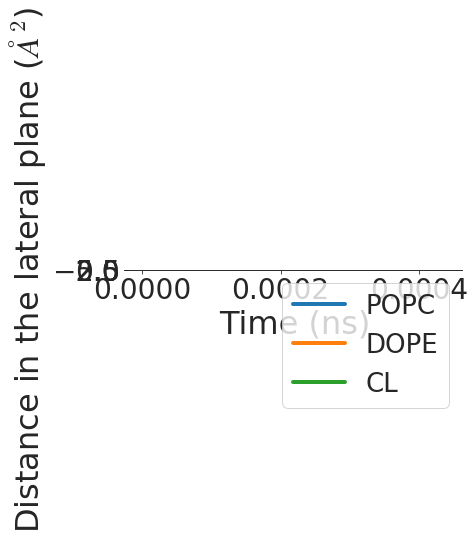

In [18]:
#get the data for msd_1
print(ba.get_analysis_data('msd_1'))
#notebook magic
%matplotlib inline
# show the msd_all plot
ba.show_plot('msd_all')